Iut de villetaneuse -BUT S1-INFO  


                  SAE 1.04 Création d'une base de donénes
                                                               
Zhang Claude
         

# Phase I : Analyse et modèle de donnée

--------------------------------------------------------------------------------------------------------------------

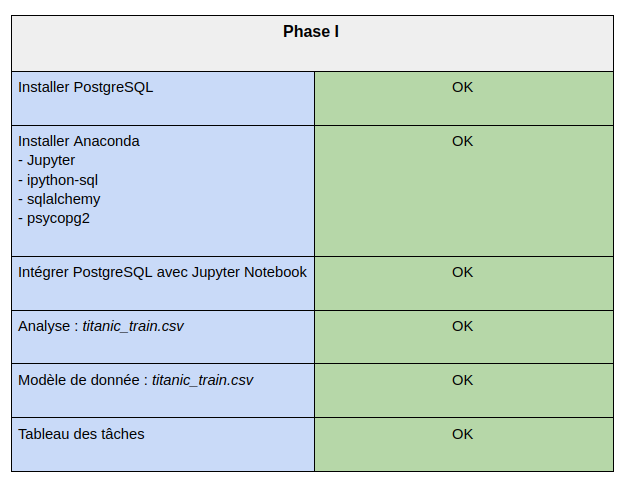

# Phase II: Mini Rapport + Script


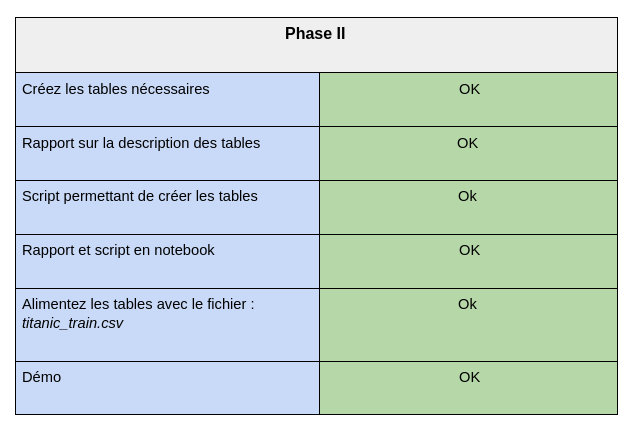

--------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd 
import sqlite3

In [ ]:
data=pd.read_csv('titanic_train.csv')

In [ ]:
cnn = sqlite3.connect('jupyter_sql_tutorial.db')

In [ ]:
data.to_sql('Titanic',cnn)

In [ ]:
%load_ext sql
%sql sqlite:///jupyter_sql_tutorial.db

In [ ]:
%%sql

-- Script permettant de créer les tables :
    -- première table
    
-- Creation de la table : 
    Create Table Titanic_Passenger(
    PassengerId int primary key,
    Survived int,
    Name varchar(20),
    Sex varchar(20),
    Age int,
    SibSp int,
    Parch int,
    Embarked varchar(20)
    );
    
-- On insere les valeurs correspondants aux attributs : 
    
    Insert into Titanic_Passenger(PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Embarked) select PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Embarked from Titanic;

In [ ]:
%%sql

Create table Ticket_Passenger(
    PassengerId int,
    Pclass int,
    Ticket varchar(20),
    Fare float,
    Cabin varchar(20),
    Embarked varchar(20),
    primary key (PassengerId),
    foreign key(PassengerId) references Titanic_Passenger(PassengerId),
    foreign key(Embarked) references Titanic_Passenger(Embarked)
    

);

Insert into Ticket_Passenger(PassengerId,Pclass,Ticket,Fare,Cabin,Embarked) select PassengerId,Pclass,Ticket,Fare,Cabin,Embarked from Titanic;

In [ ]:
%%sql

-- Equijointure des deux tables


select * from Titanic_Passenger natural join Ticket_Passenger;

In [ ]:
# Rapport et script sur la description des tables avec excel

alpha=pd.read_csv('rapport Ph2 Titanic.csv')
alpha

In [ ]:
# Dans la table Titanic_Passenger, nous avons 8 attributs :
#1
La première correspond à la clé primaire et également à la clé étrangère et a pour nom d’attribut « PassengerId ». 
Cet attribut correspond à l’identifiant qui a été affecté aux passagers.
#2
La seconde se nomme « Survived » et correspond aux deux choix possible 0 ou 1 affecté aux passagers qui sont 
respectivement 0 pour n’avoir pas survécu et 1 pour avoir survécu.
#3
Le troisième attribut correspond aux noms des passagers et a pour nom d’attribut « Name ».
#4
Le quatrième attribut se défini par « Sex » et correspond à un genre (Homme ou Femme).
#5
Le cinquième attribut est l’âge correspondant aux passagers et a donc pour nom d’attribut « Age ».
#6
Le sixième correspond aux nombres de frère et sœur et épouse à bord du Titanic des passagers et a pour nom d’attribut « SibSp ».
#7
Le septième correspond aux nombres de de parent et enfant à bord du Titanic des passagers et a pour nom d’attribut « Parch »
#8
Et enfin le dernier correspond aux 3 possibilités d’embarquement choisi par les passagers et a pour nom d’attribut « Embarked »

# Dans la table Ticket_Passenger nous avons 6 attributs :

#1
La première attribut est la même que dans la première table mais cette attribut est également une clé étrangère
#2
Le second attribut correspond aux classes choisies par les passagers durant leur escale et a pour nom d’attribut « Pclass ».
#3
Le troisième attribut se nomme « Ticket » et correspond aux tickets des passagers.
#4
Le quatrième attribut se définit par « Fare » et correspond aux tarifs des passagers.
#5
Le cinquième attribut a pour nom « Cabin » et correspond à la cabine affectée aux passagers.
#6
Et enfin le dernier correspond aux 3 possibilités d’embarquement choisi par les passagers et a pour nom d’attribut « Embarked ».
Cet attribut est une clé étrangère.

---------------------------

# Phase III : Requêtes SQL

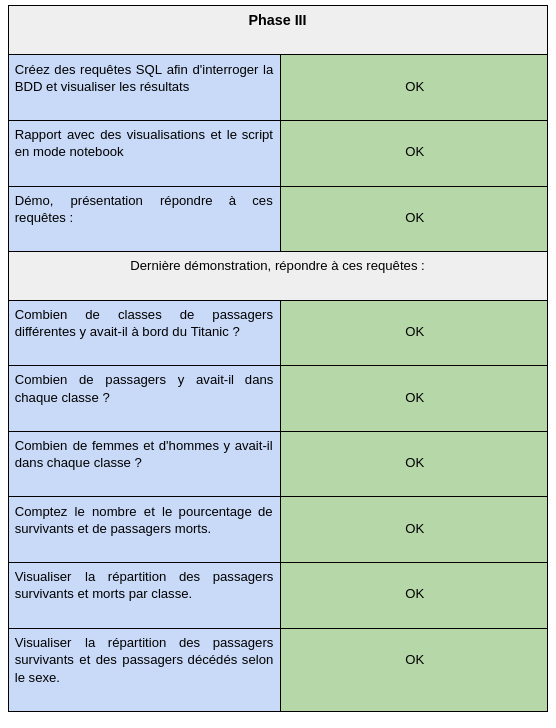

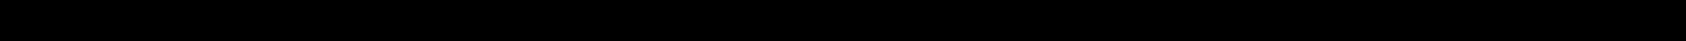

In [ ]:
%%sql

-- Phase 3
-- Requête numéro 1 
-- Combien de classes de passagers différentes y'avait-il à bord du Titanic ?

-- Réponse : 3
select distinct Pclass from Ticket_Passenger;


In [ ]:
%%sql

-- Requête numéro 2
-- Combien de passagers y'avait-il dans chaque classe?
-- Nombre de passagers en première classe


select count(Pclass) as 'number_in_first_class'
from Ticket_Passenger
where Pclass=1;

In [ ]:
%%sql

-- Requête numéro 2
-- Combien de passagers y'avait-il dans chaque classe?
-- Nombre de passagers en seconde classe 

select count(Pclass) as 'number_in_second_class'
from Ticket_Passenger
where Pclass=2;

In [ ]:
%%sql

-- Requête numéro 2
-- Combien de passagers y'avait-il dans chaque classe?
-- Nombre de passagers en troisième classe 

select count(Pclass) as 'number_in_third_class'
from Ticket_Passenger
where Pclass=3;

In [ ]:
%%sql

-- Resultat final de la requête 2
-- Combien de passagers y'avait-il dans chaque classe?

-- Réponse : 216 passagers dans la première classe 
--         : 184 passagers dans la seconde classe
--         : 491 passagers dans la troisième classe
    
Create table Passenger_each_class(
number_in_first_class int,
number_in_second_class int,
number_in_third_class int );

Insert into Passenger_each_class values(216,184,491);
select distinct * from Passenger_each_class;

<hr/>

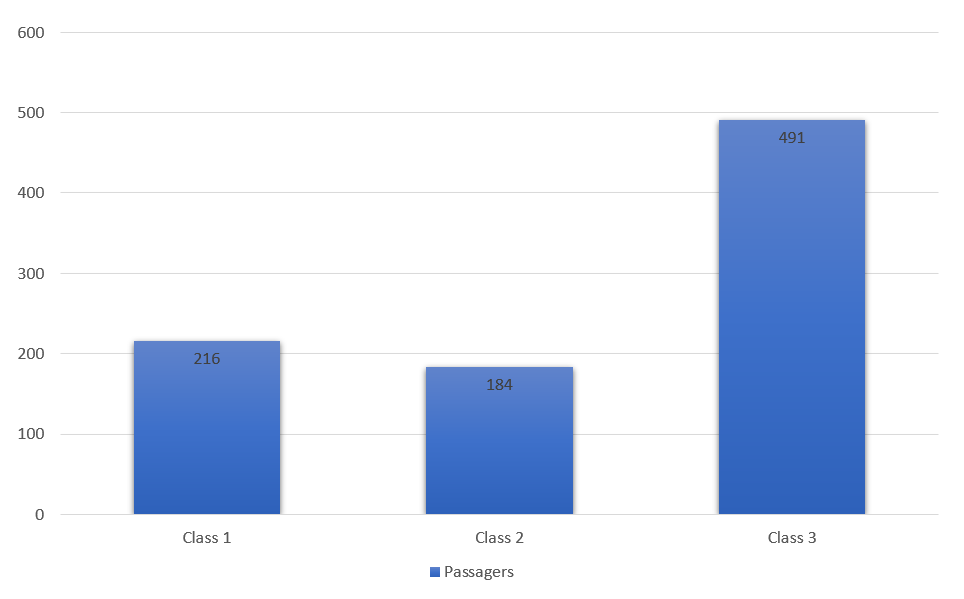

<hr/>

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en première classe comportant que des hommes

select count(Sex) as 'number_of_man_in_class1'
from Ticket_Passenger natural join Titanic_passenger
where Pclass =1 and Sex ='male';

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en seconde classe comportant que des hommes

select count(Sex) as 'number_of_man_in_class2'
from Ticket_Passenger natural join Titanic_passenger
where Pclass =2 and Sex ='male';

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en troisième classe comportant que des hommes

select count(Sex) as 'number_of_man_in_class3'
from Ticket_Passenger natural join Titanic_passenger
where Pclass =3 and Sex ='male';

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en première classe comportant que des femmes

select count(Sex) as 'number_of_women_in_class1'
from Titanic
where Pclass =1 and Sex ='female';

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en seconde classe comportant que des femmes

select count(Sex) as 'number_of_women_in_class2'
from Ticket_Passenger natural join Titanic_passenger
where Pclass =2 and Sex ='female';

In [ ]:
%%sql 

-- Requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?
-- Nombre de passagers en troisième classe comportant que des femmes

select count(Sex) as 'number_of_women_in_class3'
from Ticket_Passenger natural join Titanic_passenger
where Pclass =3 and Sex ='female';

In [ ]:
%%sql

-- Visuel final de la requête numéro 3
-- Combien de femme et d'hommes y avait-il dans chaque classe ?

-- Réponse à la question 3 : 122 hommes dans la première classe
--                         : 108 hommes dans la seconde classe
--                         : 347 hommes dans la troisième classe
--                         : 94  femmes dans la première classe
--                         : 76  femmes dans la seconde classe
--                         : 144 femmes dans la seconde classe
    
Create table Women_and_man_each_class(
number_of_man_in_class1 int,
number_of_man_in_class2 int,
number_of_man_in_class3 int,
number_of_women_in_class1 int,
number_of_women_in_class2 int,
number_of_women_in_class3 int);

Insert into Women_and_man_each_class values(122,108,347,94,76,144);
select distinct * from Women_and_man_each_class;

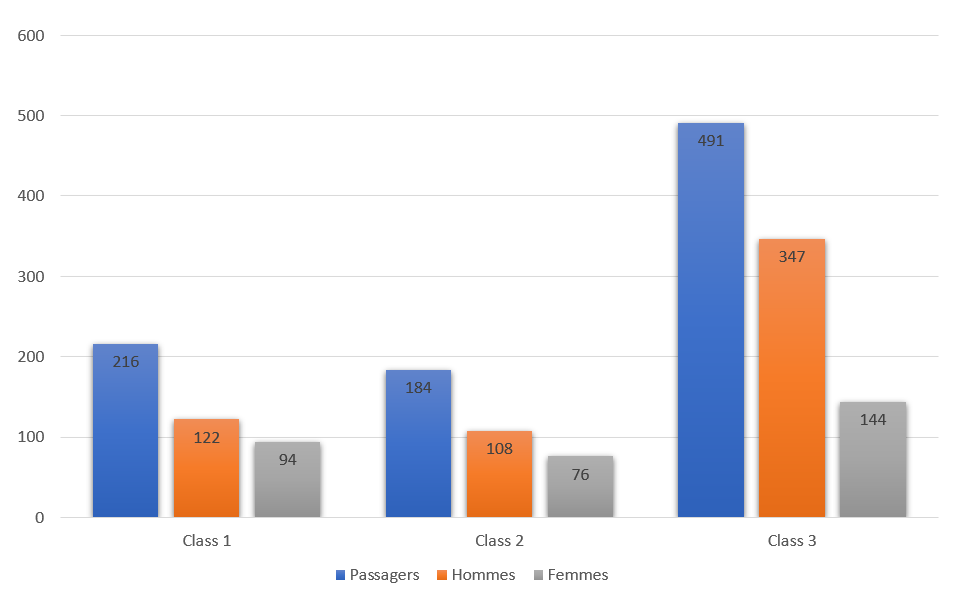

In [ ]:
%%sql

-- requête 4 
-- Comptez le nombre et le pourcentage de survivants et de passagers morts

select count(Survived) as 'death'
from Titanic_Passenger
where Survived =0;

In [ ]:
%%sql

-- requête 4 
-- Comptez le nombre et le pourcentage de survivants et de passagers morts

select count(Survived) as 'alive'
from Titanic_Passenger
where Survived =1;

In [ ]:
%%sql

-- Visuel final requête 4
-- Comptez le nombre et le pourcentage de survivants et de passagers morts
-- Réponse à la question 4 : il y'a 342 survivants et 549 morts.
--    Le pourcentage de survivants est de 38%
--    Le pourcentage de mort quant à lui est de 61%

Create table Per_cent_alive_death(
death int, 
alive int,
per_cent_death int, 
per_cent_alive int 
);

Insert into Per_cent_alive_death values(549,342,((549*100)/891),((342*100)/891));
select distinct * from per_cent_alive_death;

In [ ]:
%%sql

-- Requête 5
-- Visualiser la répartition des passagers survivants et morts par classe
-- Survivants Pclass 1

create view  alive_1 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =1 and Pclass=1;

select * from alive_1;

In [ ]:
%%sql

-- Survivants Pclass 2

create view alive_2 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =1 and Pclass=2;

select * from alive_2;

In [ ]:
%%sql

-- Survivants Pclass 3

create view alive_3 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =1 and Pclass=3;
select * from alive_3;

In [ ]:
%%sql

-- Décédé Pclass 1 

create view death_1 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =0 and Pclass=1;
select * from death_1;

In [ ]:
%%sql

-- Décédé Pclass 2

create view death_2 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =0 and Pclass=2;
select * from death_2;

In [ ]:
%%sql

-- Décédé Pclass 3
-- Ps la troisième classe rencontre un nombre significatif de décès 

create view death_3 as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =0 and Pclass=3;
select * from death_3;

In [ ]:
%%sql

-- Visuel final requête 5
-- Visualiser la répartition des passagers survivants et morts par classe

-- Réponse à la question 5 : 136 passagers vivants dans la première classe
--                         : 87 passagers vivants dans la seconde classe
--                         : 119 passagers vivants dans la troisième classe
--                         : 80 passagers morts dans la première classe
--                         : 97 passagers morts dans la seconde classe
--                         : 372 passagers morts dans la troisième classe
    
-- Chaque classe a un nombre de survivants plus ou moins équivalents 
-- La troisième classe représente quant à lui un nombre de décès significatif équivalents à 68% du nombre de décès total

Create table Alive_Death_each_class(
alive_1 int,
alive_2 int,
alive_3 int,
death_1 int,
death_2 int,
death_3 int
);

Insert into Alive_Death_each_class values(136,87,119,80,97,372);
Select * from Alive_Death_each_class;

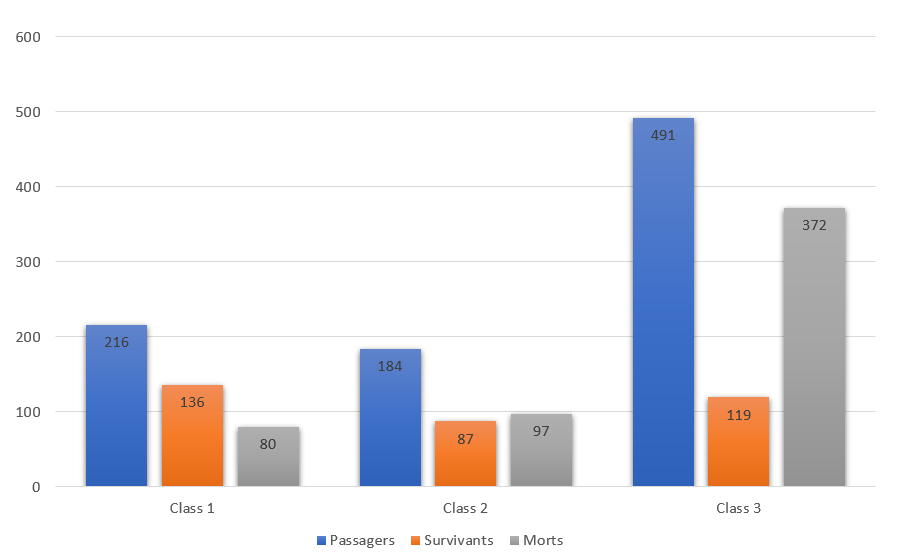

<hr/>

In [ ]:
%%sql

-- Requête 6 
-- Visualiser la répartition des passagers survivants et des passagers décédés selon le sexe

-- Survivant sexe Homme

create view man_alive as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =1 and Sex ="male";
select * from man_alive;

In [ ]:
%%sql

-- Décédés sexe Homme

create view man_death as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =0 and Sex ='male';
select * from man_death;

In [ ]:
%%sql

-- Survivant sexe Femme

create view women_alive as select count(Survived) 
from Titanic
where Survived =1 and Sex ='female';
select * from women_alive;

In [ ]:
%%sql

-- Décédés sexe Femme

create view women_death as select count(Survived) 
from Titanic_Passenger natural join Ticket_Passenger
where Survived =0 and Sex ='female';
select * from women_death;

In [ ]:
%%sql

-- Visuel final de la requête 6  
-- Visualiser la répartition des passagers survivants et des passagers décédés selon le sexe

-- Réponse à la question 6 : 109 hommes vivants
--                         : 233 femmes vivantes
--                         : 468 hommes morts
--                         : 81  femmes mortes
    
-- Bonus pourcentage des Survivants par sexe 
-- Pourcentage de survivant des hommes : 31%
-- Pourcentage de survivant des femmes : 68%
-- Bonus pourcentage des Décédés par Sexe
-- Pourcentage de décès des hommes : 85%
-- Pourcentage de décès des femmes : 14%
    
-- On remarque que le pourcentage de décès est très significatif du côté des hommes


Create table Alive_Death_by_sex(
man_alive int,
women_alive int,
man_death int,
women_death int,
per_cent_man_alive int,
per_cent_women_alive int,
per_cent_man_death int,
per_cent_women_death int

);

Insert into Alive_Death_by_sex values(109,233,468,81,((109*100)/342),((233*100)/342),((468*100)/549),((81*100)/549));
select * from Alive_Death_by_sex ;

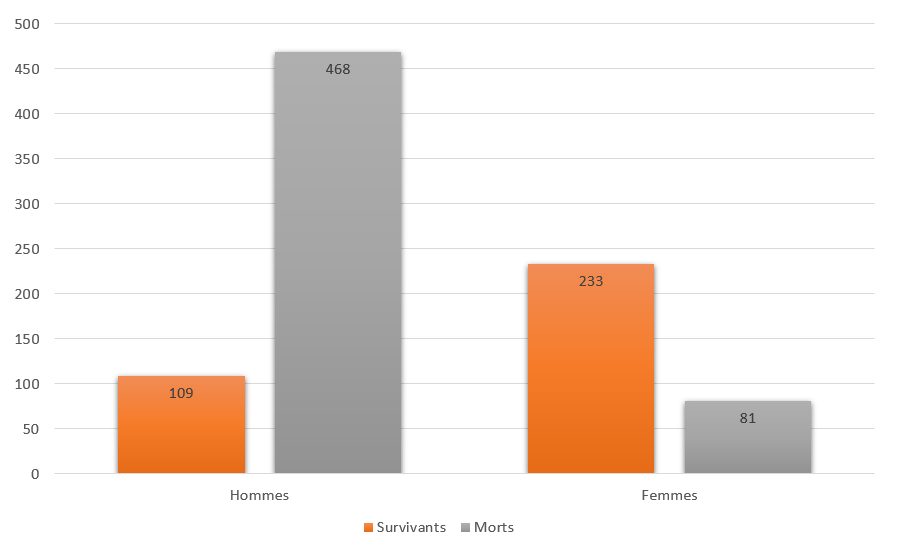